# 🧪 Lab 3: Multi-Class Classification with Softmax

**Course**: COMP 3037 Introduction to AI  
**Instructor**: Ross Bigelow  
**Objective**: Learn how to build a neural network for multi-class classification using softmax activation and cross-entropy loss.

In this lab, you'll classify handwritten digits (0–9) using the MNIST dataset. This is a classic multi-class classification problem with 10 classes.

You'll learn to:
- Use softmax activation to output class probabilities
- Apply one-hot encoding to labels
- Use categorical cross-entropy as a loss function
- Evaluate model performance with accuracy and visualizations

In [1]:
# 📦 Step 1: Import required libraries
# TensorFlow and Keras are used to build and train the neural network
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

## 📥 Step 2: Load and preprocess the MNIST dataset
MNIST contains 70,000 grayscale images of handwritten digits (28x28 pixels). We'll normalize pixel values and one-hot encode the labels.

In [2]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## 🧠 Step 3: Build the neural network model
We'll use a simple feedforward neural network with:
- A Flatten layer to convert 28x28 images into 784-dimensional vectors
- Two hidden layers with ReLU activation
- A final layer with 10 neurons and softmax activation for multi-class output

In [3]:
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),       # Converts 2D image to 1D vector
    Dense(128, activation='relu'),       # First hidden layer
    Dense(64, activation='relu'),        # Second hidden layer
    Dense(10, activation='softmax')      # Output layer with softmax for 10 classes
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## ⚙️ Step 4: Compile the model
We use:
- `adam` optimizer for efficient training
- `categorical_crossentropy` loss for comparing predicted probabilities with one-hot labels
- `accuracy` as the evaluation metric

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 🚀 Step 5: Train the model
We'll train for 10 epochs with a batch size of 64 and use 10% of the training data for validation.

In [5]:
history = model.fit(X_train, y_train_encoded,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8575 - loss: 0.5133 - val_accuracy: 0.9653 - val_loss: 0.1191
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9637 - loss: 0.1224 - val_accuracy: 0.9745 - val_loss: 0.0908
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9739 - loss: 0.0864 - val_accuracy: 0.9715 - val_loss: 0.0957
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9805 - loss: 0.0631 - val_accuracy: 0.9763 - val_loss: 0.0828
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9870 - loss: 0.0452 - val_accuracy: 0.9777 - val_loss: 0.0739
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9880 - loss: 0.0362 - val_accuracy: 0.9793 - val_loss: 0.0786
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9898 - loss: 0.0313 - val_accuracy: 0.9808 - val_loss: 0.0768
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9935 - loss: 0.0213 - val_accuracy: 0.

## 📊 Step 6: Visualize training performance
We'll plot accuracy and loss curves to understand how the model learns over time.

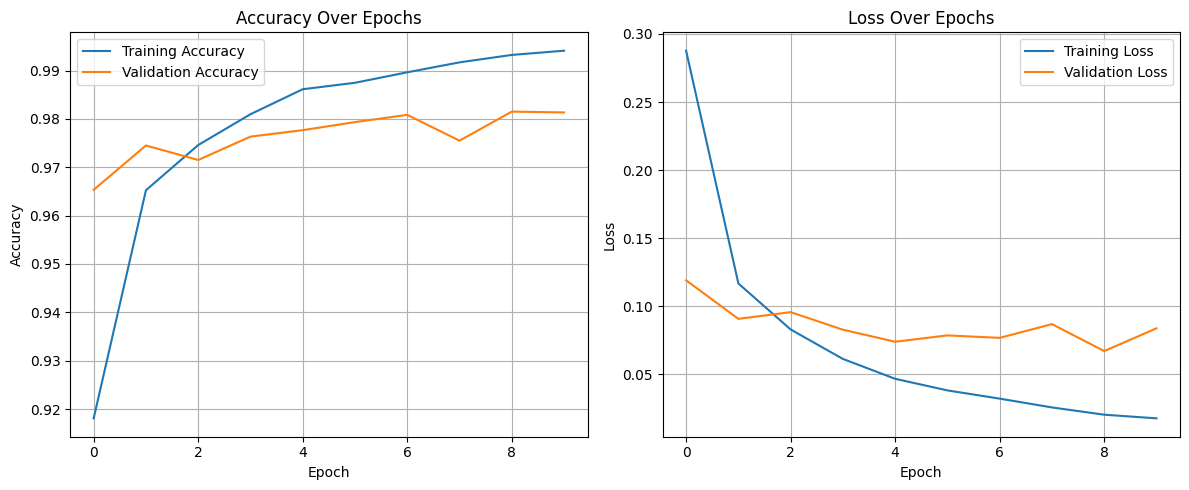

In [6]:
# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 🧪 Step 7: Evaluate model on test data
We'll measure final accuracy on unseen test images.

In [7]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9720 - loss: 0.1055
Test Accuracy: 0.9765


## 🔍 Step 8: Live Prediction Sample
We'll randomly select a test image, visualize it, and show the predicted digit.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


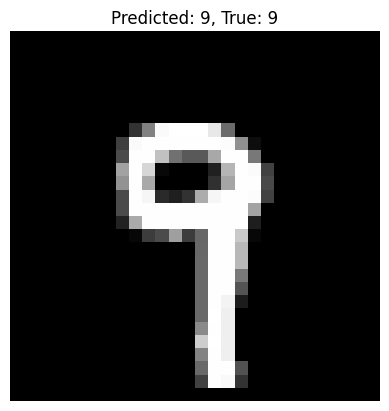

In [19]:
index = np.random.randint(0, X_test.shape[0])
sample_image = X_test[index]
true_label = y_test[index]

# Predict
prediction = model.predict(sample_image.reshape(1, 28, 28))
predicted_label = np.argmax(prediction)

# Show image
plt.imshow(sample_image, cmap='gray')
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.axis('off')
plt.show()

## 📝 Reflection Questions

1. Why do we use softmax instead of sigmoid for multi-class classification?
2. What does one-hot encoding achieve in this context?
3. How would you improve this model’s performance?
4. What are the limitations of using MNIST as a benchmark?